In [4]:
import os
import zipfile
import pandas as pd
import pandas as pd
import os
import requests
from pymongo import MongoClient
import psycopg2
from sqlalchemy import create_engine
import psycopg2 
import io
import pandas.io.sql as sqlio
import requests
import json
import csv
import cv2
import pytesseract
import pandas as pd 
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
import lightgbm as lgb
import numpy as np
import pandas as pd
from prophet import Prophet

In [5]:
#File Download

In [6]:
# Creating the function to download the files from kaggle
def extract_data(file_name, file_path):
    #!kaggle competitions download  -d "NIFTY-50 Stock Market Data (2000 - 2021)" # -f $file_name -p $file_path --force
   !kaggle datasets download -d rohanrao/nifty50-stock-market-data


In [7]:
#file name
import os
file_name = "NIFTY50_all.csv"

#file_path
raw_data_path  = os.path.join(os.path.pardir, 'data', 'raw')
extract_data(file_name, raw_data_path)

nifty50-stock-market-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
#Unzipping the zipped file
import zipfile
with zipfile.ZipFile("C:/Users/gongy/Downloads/Archive.zip","r") as zip_ref:
    zip_ref.extractall("C:/Users/gongy/Downloads/stock_price/code")

In [9]:
# Changing the working directory
os.chdir('C:/Users/gongy/Downloads/stock_price/code')

In [10]:
# Reading the file
import pandas as pd
df = pd.read_csv('NIFTY50_all.csv')

In [11]:
#Data Pre-processing

In [12]:
# Checking whether there are any null values 
df.isnull().sum()

Date                       0
Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                114848
Deliverable Volume     16077
%Deliverble            16077
dtype: int64

In [13]:
# Dropping the columns that aren't required 
df.drop('Trades',axis=1,inplace=True)
df.drop('Deliverable Volume',axis=1,inplace=True)
df.drop('%Deliverble',axis=1,inplace=True)
df.drop('Turnover',axis=1,inplace=True)

In [14]:
#Converting dataframe to an csv file
csvfile = df.to_csv('NIFTY50_all2.csv', sep = ',',index=0,header=True)

In [15]:
#Creating a database in postgreSQL
try :
    dbConnection = psycopg2.connect(
        user = "postgres",
        password = "Login1-89",
        host = "localhost",
        port = "5432",
        database = "postgres")
    dbConnection.set_isolation_level(0)
    dbCursor = dbConnection.cursor()
    dbCursor.execute("CREATE DATABASE STOCKS1;")
    dbCursor.close()
except (Exception,psycopg2.Error) as dbError :
        print("Error while connecting to postgreSQL", dbError)
finally :
            if(dbConnection) :
                dbConnection.close()

Error while connecting to postgreSQL 错误:  数据库 "stocks1" 已经存在



In [16]:
#Creating the table in the postgresql
try:
    dbConnection = psycopg2.connect(
        user = "postgres",
        password = "Login1-89",
        host = "localhost",
        port = "5432",
        database = "stocks1")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute("""CREATE TABLE stock_stg(date text,
    Symbol text,
    Series text,
    Prev_Close float,
    Open float8,
    High float8,
    Low float8,
    Last float8,
    Close float8,
    VWAP float8,
    Volume integer);""")
    dbCursor.close()
    #dbCursor.execute("""ALTER TABLE Vehicles DROP COLUMN Total_registered_5""")
    #dbCursor.execute("""ALTER TABLE Vehicles ADD COLUMN Total_registered_5 INT""")
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection): dbConnection.close()

Error while connecting to PostgreSQL 错误:  关系 "stock_stg" 已经存在



In [17]:
#Inserting the values in the postgre sql
import csv
try:
    dbConnection = psycopg2.connect(
        user="postgres",
        password="Login1-89",
        host="localhost",
        port="5432",
        database="stocks1")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    #insertString = "INSERT INTO Vehicles VALUES ('{}',"+"{},"*3+"{})"
    #with open("F:/NCI/DAP/DAP Code/DAP Code/raw_data/Sample/cleanedtwo.csv", 'r') as f:
    f = open(r'C:\Users\gongy\Downloads\stock_price\code\NIFTY50_all2.csv', 'r')
    reader = csv.reader(f)
    next(reader) # skip the header
        #for row in reader:
         #   dbCursor.execute(insertString.format(*row))
    dbCursor.copy_from(f, 'stock_stg',sep=',')
    dbConnection.commit()
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [18]:
#reading the data
try:
    dbConnection = psycopg2.connect(
        user = "postgres",
        password = "Login1-89",
        host = "localhost",
        port = "5432",
        database = "stocks1")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute("""SELECT * FROM stock_stg;""")
    dbCursor.close()
    #dbCursor.execute("""ALTER TABLE Vehicles DROP COLUMN Total_registered_5""")
    #dbCursor.execute("""ALTER TABLE Vehicles ADD COLUMN Total_registered_5 INT""")
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [19]:
#LOAD PSQL DATABASE


# Set up a connection to the postgres server.
conn_string = "host="+ "localhost" +" port="+ "5432" +" dbname="+ "stocks1" +" user=" + "postgres" \
+" password="+ "Login1-89"
conn=psycopg2.connect(conn_string)
print("Connected!")

# Create a cursor object
cursor = conn.cursor()


def load_data(value):

    sql_command = "SELECT * FROM stock_stg where Symbol like '%{0}%';".format(str(value))
    print (sql_command)

    # Load the data
    data = pd.read_sql(sql_command, conn)

    print(data.shape)
    return (data)

Connected!


In [20]:
#Text Recognition

In [21]:
import cv2
import pytesseract
# read image
im = cv2.imread('C:/Users/gongy/Downloads/15.jpg')
# configurations
config = ('-l eng --oem 1 --psm 3')
# pytessercat
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\gongy\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'
text = pytesseract.image_to_string(im)
#text
text = text.split('\n')
text

['BAIA', 'FINSERV', '', '']

In [22]:
df99 = text[1]
df99 = df99[0:4]
df99 = df99.upper()
data1 = load_data(df99)

SELECT * FROM stock_stg where Symbol like '%FINS%';
(76824, 11)


In [23]:
data1

,date,symbol,series,prev_close,open,high,low,last,close,vwap,volume
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.00,505.10,509.10,548.85,3145446
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.10,564.00,554.65,572.15,4349144
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.00,643.00,640.95,618.37,4588759
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.00,634.50,632.40,659.60,4522302
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.30,647.00,644.00,636.41,3057669
...,...,...,...,...,...,...,...,...,...,...,...
76819,2021-04-26,BAJAJFINSV,EQ,9916.65,9992.00,10125.00,9902.20,10000.85,10001.75,9995.72,419596
76820,2021-04-27,BAJAJFINSV,EQ,10001.75,10000.00,10133.00,9964.70,10133.00,10091.35,10036.76,342847
76821,2021-04-28,BAJAJFINSV,EQ,10091.35,10200.00,10615.95,10151.15,10480.00,10489.30,10445.96,1113881
76822,2021-04-29,BAJAJFINSV,EQ,10489.30,10540.00,11300.00,10520.00,11175.45,11176.55,10980.40,1696498


In [24]:
data = data1

In [25]:
df1 = data[['date','close']]

In [26]:
df1.isnull().sum()

date     0
close    0
dtype: int64

In [27]:
#Removal of Outliers

In [37]:
#Describing the statistical information of the data
df1.close.describe()

count    76824.000000
mean      2758.657451
std       2873.092432
min         90.750000
25%        527.900000
50%       1098.700000
75%       5125.100000
max      11176.550000
Name: close, dtype: float64

In [45]:
#Determining the quantile (q1,q2)
q1 = df1.close.quantile(0.25)
q3 = df1.close.quantile(0.75)

# Determining the Inter Quartile Range
IQR = q3-q1

# Determining the lower limit and the upper limit
lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR

# Data free from outliers are taken for analysis
df1_no_outlier = df1[(df1.close>lower_limit)&(df1.close<upper_limit)]
df1_no_outlier

,date,close
0,2008-05-26,509.10
1,2008-05-27,554.65
2,2008-05-28,640.95
3,2008-05-29,632.40
4,2008-05-30,644.00
...,...,...
76819,2021-04-26,10001.75
76820,2021-04-27,10091.35
76821,2021-04-28,10489.30
76822,2021-04-29,11176.55


In [46]:
# Convert Date into Datetime
df1_no_outlier['date']=pd.to_datetime(df1_no_outlier['date'])

In [47]:
# Indexing with respect to date column
df1_no_outlier.set_index('date',inplace=True)

In [48]:
df_close = df1_no_outlier['close']

In [ ]:
#TEST FOR STATIONARY

In [73]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

ADF Test Statistic : -40.11245348995153
p-value : 0.0
#Lags Used : 59
Number of Observations Used : 73562
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

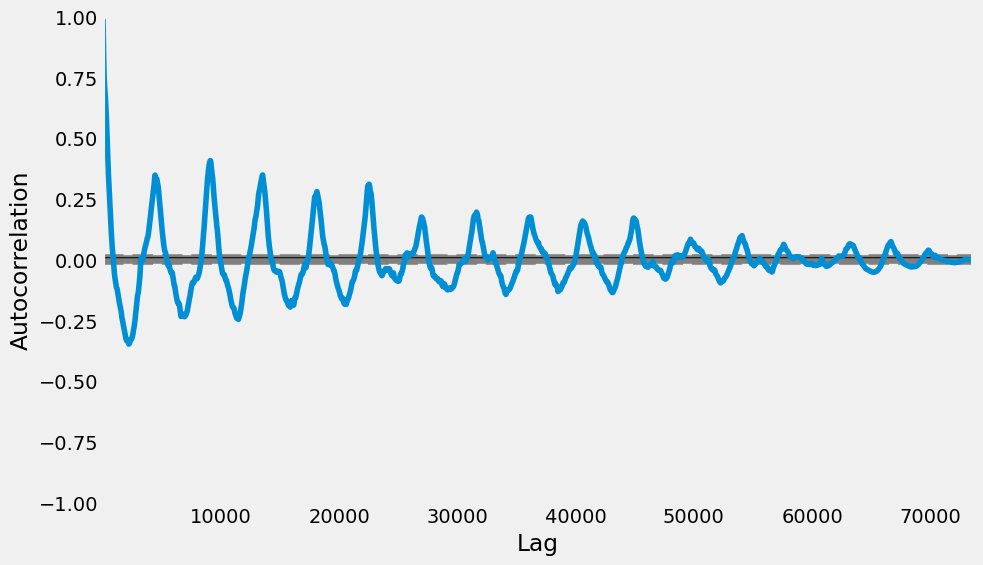

In [143]:
#Differencing of Close price
df1_no_outlier['Sales First Difference'] = df1_no_outlier['close'] - df1_no_outlier['close'].shift(1)

## Again test dickey fuller test
adfuller_test(df1_no_outlier['Sales First Difference'].dropna())

df1_no_outlier.dropna(axis = 0, inplace = True)

# Plotting the auto correlation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1_no_outlier['close'])

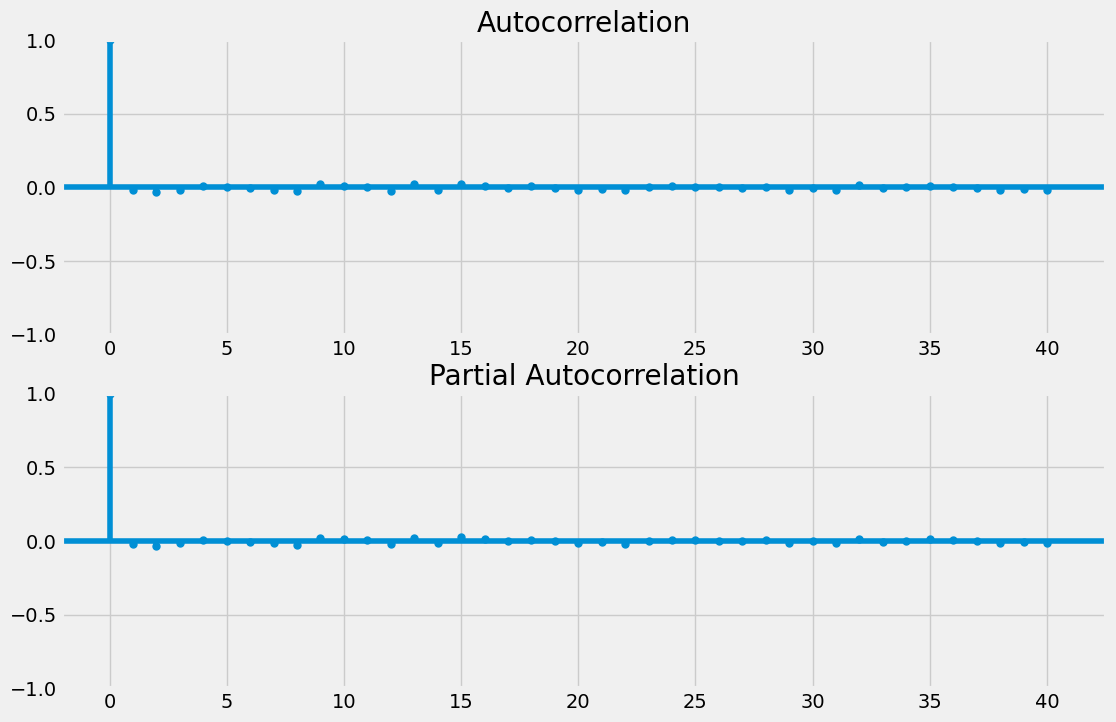

In [47]:
# Plotting the PACF and ACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1_no_outlier['Sales First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1_no_outlier['Sales First Difference'].dropna(),lags=40,ax=ax2)

In [83]:
# Splitting the data into train and test data
df1_train = df1_no_outlier[df1_no_outlier.index < "2019"]
df1_test = df1_no_outlier[df1_no_outlier.index >= "2019"]

In [86]:
# Taking the log values of the train and test data
train_data, test_data = np.log(df1_train['close']), np.log(df1_test['close'])

In [87]:
#ARIMAX MODEL

In [88]:
# Sending the data to df6 for the ARIMAX model
df6 = data

In [89]:
# Convert Date into Datetime
df6['date']=pd.to_datetime(df6['date'])

In [90]:
# Setting the date column as index
df6.set_index("date", drop=False, inplace=True)
df6.head()

,date,symbol,series,prev_close,open,high,low,last,close,vwap,volume
date,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446
2008-05-27,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144
2008-05-28,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759
2008-05-29,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302
2008-05-30,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669


In [91]:
# Determining the lag features for the model by keeping the window for three days, 1 week and 1 month
df6.reset_index(drop=True, inplace=True)
lag_features = ["high", "low", "volume"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df6[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df6[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df6[lag_features].rolling(window=window3, min_periods=0)


In [92]:

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

fill_cols = []
for feature in lag_features:
    df6[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df6[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df6[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df6[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df6[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df6[f"{feature}_std_lag{window3}"] = df_std_30d[feature]
    
    fill_cols.extend([f"{feature}_mean_lag{window1}", f"{feature}_mean_lag{window2}", f"{feature}_mean_lag{window3}", f"{feature}_std_lag{window1}", f"{feature}_std_lag{window2}", f"{feature}_std_lag{window3}"])

df6[fill_cols]=df6[fill_cols].fillna(df6[fill_cols].mean())

In [93]:
df6.set_index("date", drop=False, inplace=True)
df6.head()

,date,symbol,series,prev_close,open,high,low,last,close,vwap,...,low_mean_lag30,low_std_lag3,low_std_lag7,low_std_lag30,volume_mean_lag3,volume_mean_lag7,volume_mean_lag30,volume_std_lag3,volume_std_lag7,volume_std_lag30
date,,,,,,,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,...,2714.837402,45.605179,76.140106,189.572296,2.315512e+05,2.316324e+05,2.319752e+05,106926.625000,140710.28125,201975.28125
2008-05-27,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,...,501.000000,45.605179,76.140106,189.572296,3.145446e+06,3.145446e+06,3.145446e+06,106926.625000,140710.28125,201975.28125
2008-05-28,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,...,496.049988,7.000357,7.000357,7.000357,3.747295e+06,3.747295e+06,3.747295e+06,851143.000000,851143.00000,851143.00000
2008-05-29,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,...,518.700012,39.542004,39.542004,39.542004,4.027783e+06,4.027783e+06,4.027783e+06,773461.562500,773461.56250,773461.56250
2008-05-30,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,...,541.025024,59.042385,55.099934,55.099934,4.486735e+06,4.151413e+06,4.151413e+06,123703.664062,678207.75000,678207.75000


In [94]:
#Determing the other exogenous features
df6.date = pd.to_datetime(df6.date, format="%Y-%m-%d")

In [95]:
df6["month"] = df6.date.dt.month
df6["week"] = df6.date.dt.week
df6["day"] = df6.date.dt.day
df6["day_of_week"] = df6.date.dt.dayofweek
df6.head()

,date,symbol,series,prev_close,open,high,low,last,close,vwap,...,volume_mean_lag3,volume_mean_lag7,volume_mean_lag30,volume_std_lag3,volume_std_lag7,volume_std_lag30,month,week,day,day_of_week
date,,,,,,,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,...,2.315512e+05,2.316324e+05,2.319752e+05,106926.625000,140710.28125,201975.28125,5,22,26,0
2008-05-27,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,...,3.145446e+06,3.145446e+06,3.145446e+06,106926.625000,140710.28125,201975.28125,5,22,27,1
2008-05-28,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,...,3.747295e+06,3.747295e+06,3.747295e+06,851143.000000,851143.00000,851143.00000,5,22,28,2
2008-05-29,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,...,4.027783e+06,4.027783e+06,4.027783e+06,773461.562500,773461.56250,773461.56250,5,22,29,3
2008-05-30,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,...,4.486735e+06,4.151413e+06,4.151413e+06,123703.664062,678207.75000,678207.75000,5,22,30,4


In [96]:
# Splitting the data into train and test data
df_train = df6[df6.date < "2019"]
df_valid = df6[df6.date >= "2019"]

# Assigning the lag values and other additional date time values to the exogenous feature data frame
exogenous_features = ["high_mean_lag3", "high_std_lag3", "low_mean_lag3", "low_std_lag3",
                      "volume_mean_lag3", "volume_std_lag3",
                      "high_mean_lag7", "high_std_lag7", "low_mean_lag7", "low_std_lag7",
                      "volume_mean_lag7", "volume_std_lag7","high_mean_lag30", "high_std_lag30", 
                      "low_mean_lag30", "low_std_lag30",
                      "volume_mean_lag30", "volume_std_lag30","month", "week", "day", "day_of_week"]

In [97]:
#FACEBOOK PROPHET MODEL PREDICTION

18:12:37 - cmdstanpy - INFO - Chain [1] start processing
18:15:22 - cmdstanpy - INFO - Chain [1] done processing


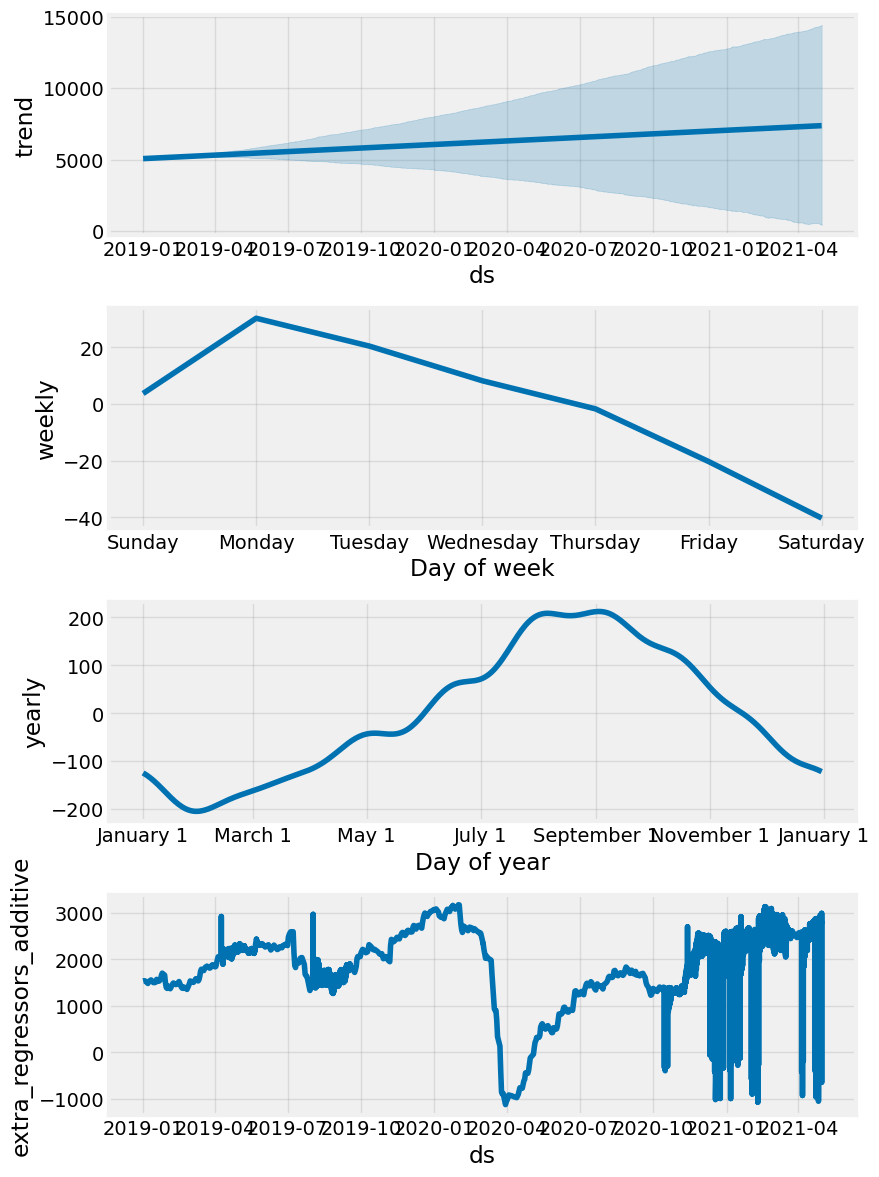

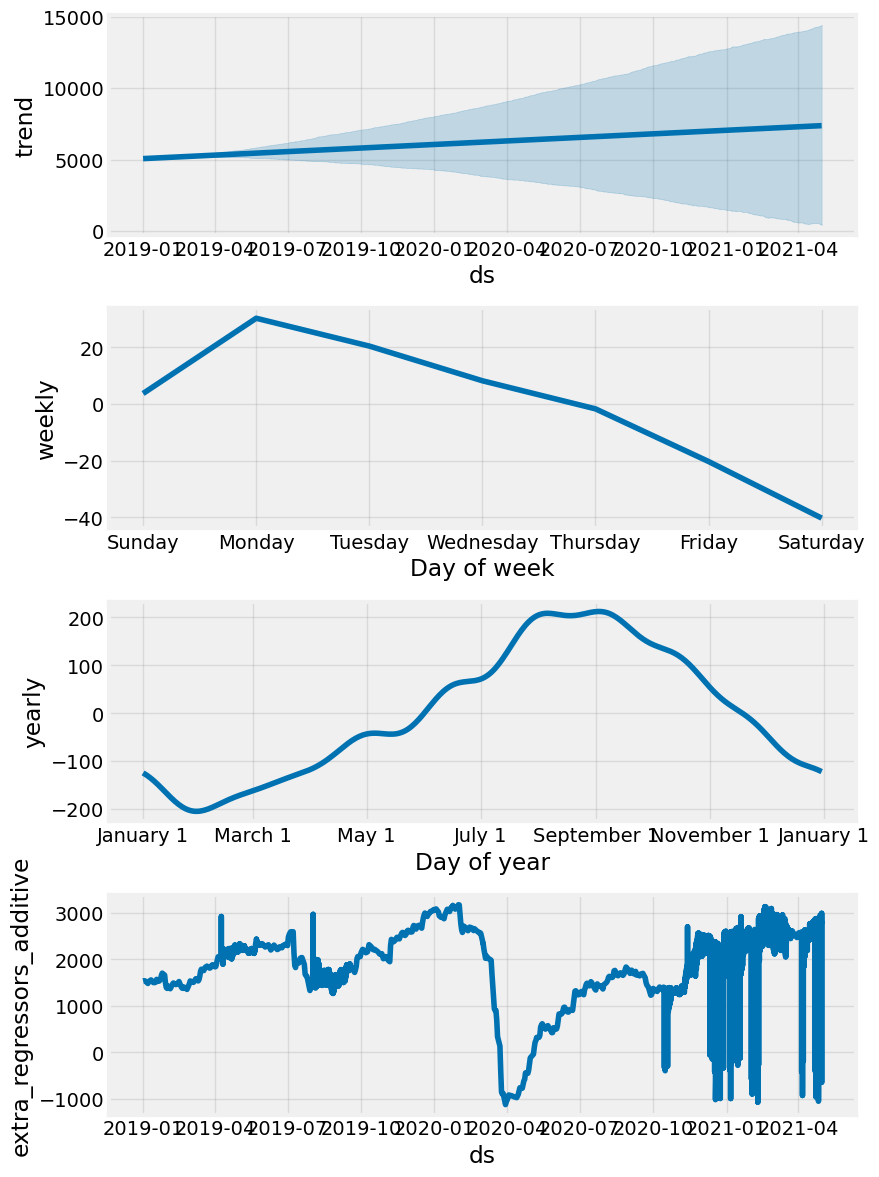

In [98]:
#Seed for FB prophet model
myfavouritenumber = 37
seed = myfavouritenumber
np.random.seed(seed)
#Fitting the FB prophet model
model_fbp = Prophet()
for feature in exogenous_features:
    model_fbp.add_regressor(feature)
    
model_fbp.fit(df_train[["date", "close"] + exogenous_features].rename(columns={"date": "ds", "close": "y"}))

forecast = model_fbp.predict(df_valid[["date", "close"] + exogenous_features].rename(columns={"date": "ds"}))
df_valid["Forecast_Prophet"] = forecast.yhat.values

# Forecasting the data for EDA
model_fbp.plot_components(forecast)

In [101]:
# Fitting the ARIMAX model
model = auto_arima(df_train.close, exogenous=df_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.close, exogenous=df_train[exogenous_features])

# Predicting the close price data for the test data
forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid["Forecast"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=754971.822, Time=5.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1077345.947, Time=0.68 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=999361.861, Time=11.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1115284.389, Time=0.39 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=754973.286, Time=3.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=754970.178, Time=30.91 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=754977.336, Time=2.70 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=754958.120, Time=34.45 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=1.86 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=754974.375, Time=9.38 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=754949.692, Time=69.39 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=754987.173, Time=29.98 sec
 ARIMA(3,0,3)(0,0,0

In [114]:
# Forecasting the close price through ARIMAX model
df_valid[["close", "Forecast"]].plot(figsize=(14, 7))

In [113]:
plt.plot(df_train.close, label='training')
plt.plot(df_valid.close, color = 'blue', label='Actual Stock Price')
plt.plot(df_valid.Forecast, color = 'orange',label='Predicted Stock Price')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
#                 color='k', alpha=.10)


plt.title('BajajFinserv. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
#LSTM PREDICTION

In [115]:
data = data1

In [116]:
df4 = data[['date','close']]

In [117]:
df4.isnull().sum()

date     0
close    0
dtype: int64

In [118]:
df4.close.describe()

count    73623.000000
mean      2758.657451
std       2873.093245
min         90.750000
25%        527.900000
50%       1098.700000
75%       5125.100000
max      11176.550000
Name: close, dtype: float64

In [119]:
q1 = df4.close.quantile(0.25)
q3 = df4.close.quantile(0.75)

In [120]:
# Determining the Inter Quartile Range
IQR = q3-q1

In [121]:
# Determining the lower limit and the upper limit
lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR

In [131]:
df4_no_outlier = df4[(df4.close>lower_limit)&(df4.close<upper_limit)]

In [132]:
df4_no_outlier=df4_no_outlier.reset_index(level=0, drop=True)['close']

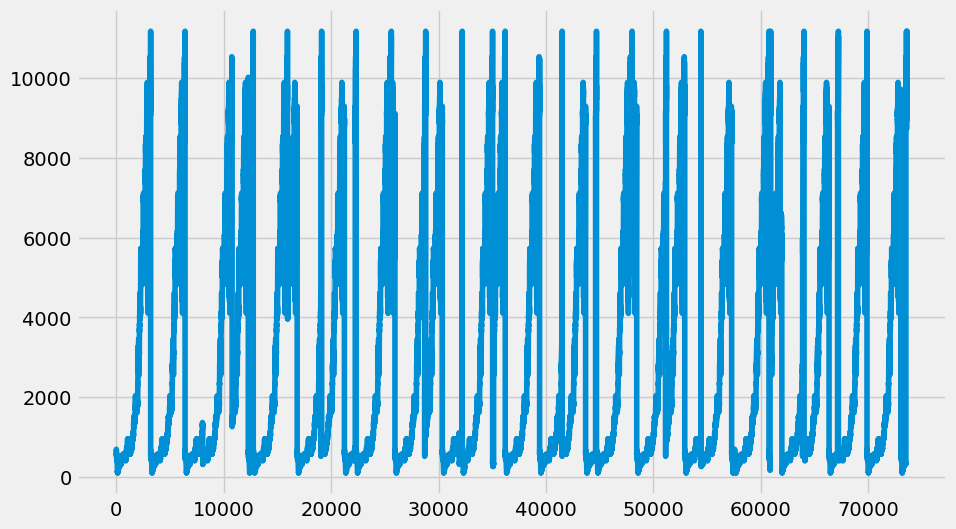

In [133]:
plt.plot(df4_no_outlier)

In [134]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df4_no_outlier=scaler.fit_transform(np.array(df4_no_outlier).reshape(-1,1))

In [135]:
##splitting dataset into train and test split
training_size=int(len(df4_no_outlier)*0.9072)
test_size=len(df4_no_outlier)-training_size
train_data,test_data=df4_no_outlier[0:training_size,:],df4_no_outlier[training_size:len(df4_no_outlier),:1]

In [136]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [137]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [138]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [139]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [140]:
# Creating the model by adding the different LSTM, DROPOUT AND DENSE layers
model=Sequential()

model.add(LSTM(50,activation = 'relu', return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.5))

model.add(LSTM(60,activation = 'relu', return_sequences=True))
model.add(Dropout(0.6))

model.add(LSTM(80,activation = 'relu', return_sequences=True))
model.add(Dropout(0.7))

model.add(LSTM(120,activation = 'relu'))
model.add(Dropout(0.8))

model.add(Dense(units = 1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [141]:
# Checking the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [96]:
#Fitting the above created model and running it for 30 epochs
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=30,batch_size=64,verbose=1)

Epoch 1/30
725/725 [==============================] - 309s 421ms/step - loss: 0.0145 - val_loss: 0.0083
Epoch 2/30
725/725 [==============================] - 293s 405ms/step - loss: 0.0087 - val_loss: 0.0072
Epoch 3/30
725/725 [==============================] - 299s 412ms/step - loss: 0.0078 - val_loss: 0.0087
Epoch 4/30
725/725 [==============================] - 306s 422ms/step - loss: 0.0073 - val_loss: 0.0079
Epoch 5/30
725/725 [==============================] - 289s 398ms/step - loss: 0.0067 - val_loss: 0.0092
Epoch 6/30
725/725 [==============================] - 293s 404ms/step - loss: 0.0067 - val_loss: 0.0051
Epoch 7/30
725/725 [==============================] - 299s 412ms/step - loss: 0.0065 - val_loss: 0.0073
Epoch 8/30
725/725 [==============================] - 283s 390ms/step - loss: 0.0063 - val_loss: 0.0090
Epoch 9/30
725/725 [==============================] - 293s 404ms/step - loss: 0.0063 - val_loss: 0.0042
Epoch 10/30
725/725 [==============================] - 328s 452m

In [98]:
import tensorflow as tf

In [100]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

146/146 [==============================] - 10s 68ms/step


In [101]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [102]:
#Training
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train,train_predict))

3305.659722234749

In [103]:
l_rmse = np.sqrt(mean_squared_error(ytest, test_predict))
l_mae = mean_absolute_error(ytest, test_predict)

2353.0345350196562

In [104]:
#Testing
### Test Data RMSE and MAE
print("RMSE of LSTM:", np.sqrt(mean_squared_error(ytest, test_predict)))
print("\nMAE of LSTM:", mean_absolute_error(ytest, test_predict))

RMSE of LSTM: 3081.8900760373435

MAE of LSTM: 2353.0345350196562


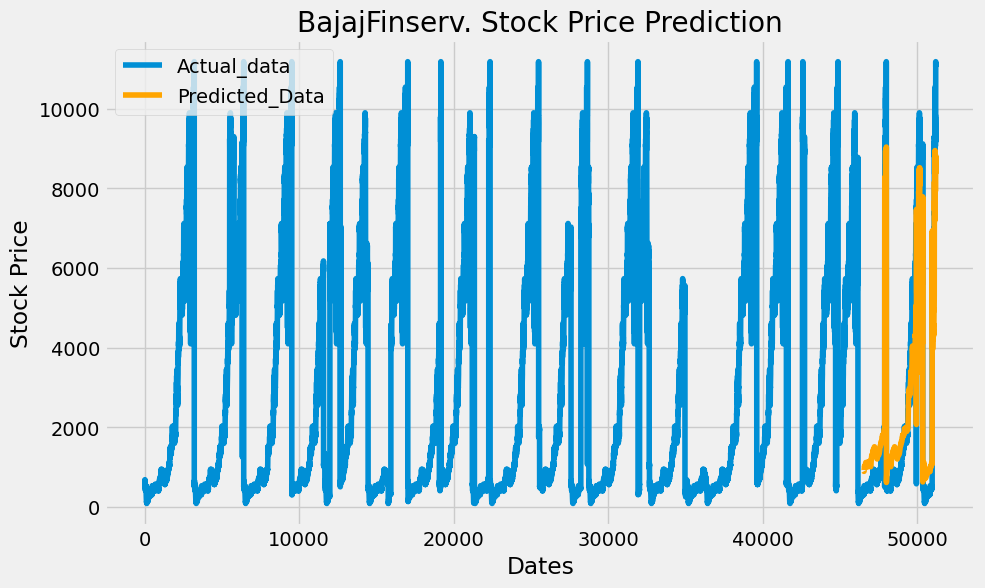

In [105]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df4_no_outlier)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df4_no_outlier)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df4_no_outlier)-1, :] = test_predict

#Predictions
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Stock Price')
plt.plot(scaler.inverse_transform(df4_no_outlier), label = 'Actual_data')
#plt.plot(trainPredictPlot, 'green', label = 'Actual_data' )
plt.plot(testPredictPlot, 'orange', label = 'Predicted_Data' )
plt.title('BajajFinserv. Stock Price Prediction')
plt.legend()
plt.show()